In [2]:
#Import basic libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Data preprocessing libraries
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

#Model training and Validation
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [3]:
#Converting data into dataframe
df=pd.read_csv('Absenteeism_at_work.csv')
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [5]:
df.shape

(740, 21)

In [6]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [7]:
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

Observation:
    1.There are 740 rows and 21 columns in the dataset.
    2.There are no missing values in the dataset.
    3.All the features are int data type,only Workload is of float datatype.

In [9]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

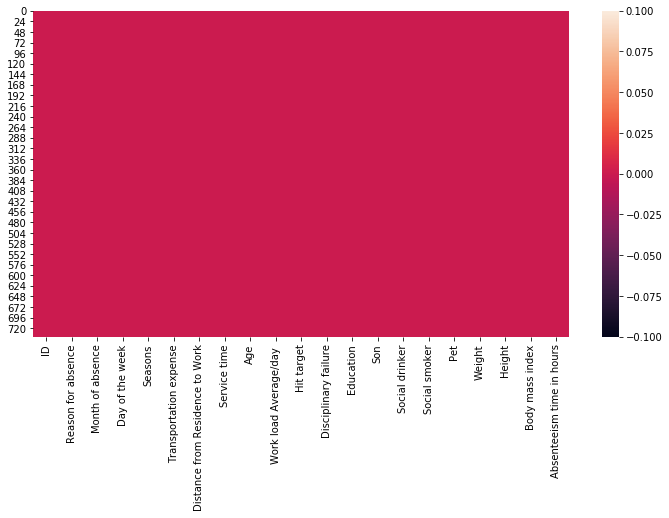

In [10]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull())

## Statistical Summary

In [11]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


Observation:
    min value is 0 and max value is 388.
    

In [12]:
#Checking correlation
df.corr()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
ID,1.000000,-0.064245,-0.000043,0.034468,0.098495,-0.224163,-0.486160,-0.272704,0.040899,0.092457,...,0.004502,-0.036254,0.002767,-0.451338,-0.010826,-0.041418,-0.254222,0.076363,-0.306924,-0.017997
Reason for absence,-0.064245,1.000000,-0.083858,0.116319,-0.117925,-0.119381,0.161831,0.048425,-0.078608,-0.123472,...,-0.545054,-0.047357,-0.055364,0.065441,-0.115702,-0.055911,-0.000269,-0.079267,0.037205,-0.173116
Month of absence,-0.000043,-0.083858,1.000000,-0.006528,0.407770,0.137525,-0.003887,-0.062862,-0.001520,-0.169989,...,0.107946,-0.066128,0.079031,0.056226,-0.038603,0.047787,0.023278,-0.068942,0.051046,0.024345
Day of the week,0.034468,0.116319,-0.006528,1.000000,0.046493,0.033988,0.118026,0.021252,0.004459,0.015646,...,-0.015120,0.058516,0.098079,0.041772,0.013156,-0.028885,-0.128980,-0.082133,-0.103578,-0.124361
Seasons,0.098495,-0.117925,0.407770,0.046493,1.000000,0.036995,-0.063108,-0.010904,-0.012089,0.150439,...,0.151766,-0.002951,0.046950,-0.045982,-0.048671,0.012356,-0.026278,-0.033737,-0.011031,-0.005615
Transportation expense,-0.224163,-0.119381,0.137525,0.033988,0.036995,1.000000,0.262183,-0.349887,-0.227542,0.005438,...,0.109222,-0.055065,0.383001,0.145117,0.044356,0.400080,-0.207435,-0.194496,-0.136517,0.027585
Distance from Residence to Work,-0.486160,0.161831,-0.003887,0.118026,-0.063108,0.262183,1.000000,0.131730,-0.145886,-0.068677,...,-0.056527,-0.259605,0.054230,0.452196,-0.075369,0.205941,-0.047859,-0.353372,0.113772,-0.088363
Service time,-0.272704,0.048425,-0.062862,0.021252,-0.010904,-0.349887,0.131730,1.000000,0.670979,-0.000668,...,-0.000221,-0.213000,-0.047128,0.353141,0.072424,-0.440301,0.455975,-0.053135,0.499718,0.019029
Age,0.040899,-0.078608,-0.001520,0.004459,-0.012089,-0.227542,-0.145886,0.670979,1.000000,-0.039425,...,0.104304,-0.221882,0.056984,0.213183,0.121738,-0.231226,0.418730,-0.062997,0.470688,0.065760
Work load Average/day,0.092457,-0.123472,-0.169989,0.015646,0.150439,0.005438,-0.068677,-0.000668,-0.039425,1.000000,...,0.029026,-0.074960,0.027820,-0.033713,0.030968,0.007114,-0.038522,0.103315,-0.090709,0.024749


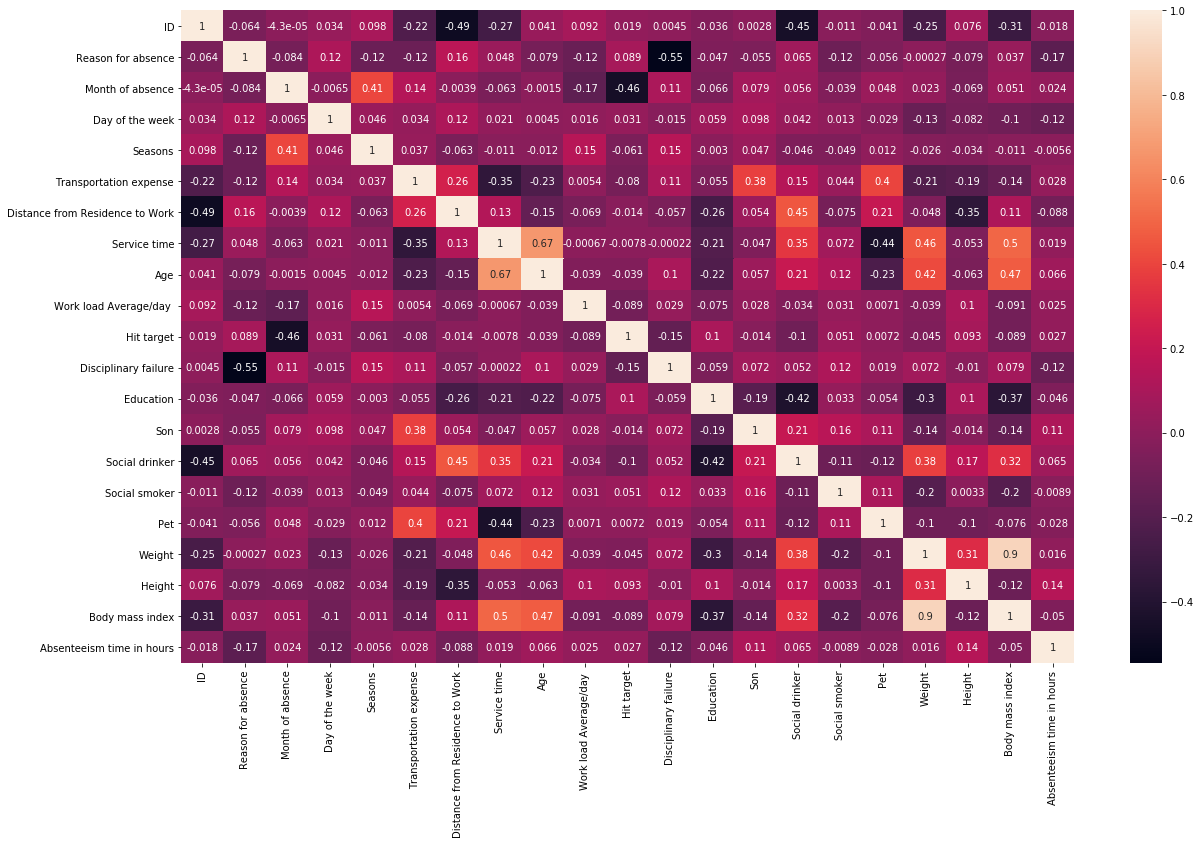

In [13]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True)

Observation:
    1.Reason of absense is negatively correlated to Disciplinary failure.
    2.Month of absence is negatively correlated to Hit target.
    3.Education is negatively correlated to Body mass index ,Social drinker.
    4.Service time is positively related to Age.

## Exploratory Data Analysis

In [14]:
for i in df.columns:
    print(i)
    print('num of unique values-->',df[i].nunique())
    if df[i].nunique()<15:
        print(df[i].unique())
    else:
        print(df[i].describe())
    print('*********************************************************')

ID
num of unique values--> 36
count    740.000000
mean      18.017568
std       11.021247
min        1.000000
25%        9.000000
50%       18.000000
75%       28.000000
max       36.000000
Name: ID, dtype: float64
*********************************************************
Reason for absence
num of unique values--> 28
count    740.000000
mean      19.216216
std        8.433406
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64
*********************************************************
Month of absence
num of unique values--> 13
[ 7  8  9 10 11 12  1  2  3  4  5  6  0]
*********************************************************
Day of the week
num of unique values--> 5
[3 4 5 6 2]
*********************************************************
Seasons
num of unique values--> 4
[1 4 2 3]
*********************************************************
Transportation expense
num of unique values--> 24
count    740.00

In [15]:
print('***number of unique values in df******')
for i in df:
    print(i,'---->',df[i].nunique())
    

***number of unique values in df******
ID ----> 36
Reason for absence ----> 28
Month of absence ----> 13
Day of the week ----> 5
Seasons ----> 4
Transportation expense ----> 24
Distance from Residence to Work ----> 25
Service time ----> 18
Age ----> 22
Work load Average/day  ----> 38
Hit target ----> 13
Disciplinary failure ----> 2
Education ----> 4
Son ----> 5
Social drinker ----> 2
Social smoker ----> 2
Pet ----> 6
Weight ----> 26
Height ----> 14
Body mass index ----> 17
Absenteeism time in hours ----> 19


### Data Cleaning

In [16]:
#Day of the week

df['Day of the week'].unique()

array([3, 4, 5, 6, 2], dtype=int64)

In [17]:
df['Day of the week'].value_counts()

2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64

In [18]:
df['Day of the week'].replace({2:'Monday',3:'Tuesday',4:'Wednesday',5:'Thursday',6:'Friday'},inplace=True)

In [19]:
df['Day of the week'].unique()

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday'],
      dtype=object)

In [20]:
#Education
df['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

In [21]:
df['Education'].value_counts()

1    611
3     79
2     46
4      4
Name: Education, dtype: int64

In [22]:
df['Education'].replace({1:'High School',2:'Graduation',3:'Post Graduation',4:'Masters and Doctor'},inplace=True)

In [23]:
df['Education'].unique()

array(['High School', 'Post Graduation', 'Graduation',
       'Masters and Doctor'], dtype=object)

In [24]:
#Social drinker

df['Social drinker'].unique()

array([1, 0], dtype=int64)

In [25]:
df['Social drinker'].value_counts()

1    420
0    320
Name: Social drinker, dtype: int64

In [26]:
df['Social drinker'].replace({1:'Yes',0:'No'},inplace=True)

In [27]:
df['Social drinker'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
#Seasons

df['Seasons'].unique()

array([1, 4, 2, 3], dtype=int64)

In [29]:
df['Seasons'].value_counts()

4    195
2    192
3    183
1    170
Name: Seasons, dtype: int64

In [30]:
df['Seasons'].replace({1:'Summer',2:'Autumn',3:'Winter',4:'Spring'},inplace=True)

In [31]:
df['Seasons'].unique()

array(['Summer', 'Spring', 'Autumn', 'Winter'], dtype=object)

In [32]:
#Disciplinary failure

df['Disciplinary failure'].unique()

array([0, 1], dtype=int64)

In [33]:
df['Disciplinary failure'].value_counts()

0    700
1     40
Name: Disciplinary failure, dtype: int64

In [34]:
df['Disciplinary failure'].replace({1:'Yes',0:'No'},inplace=True)

In [35]:
df['Disciplinary failure'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
#Social smoker

df['Social smoker'].unique()

array([0, 1], dtype=int64)

In [37]:
df['Social smoker'].value_counts()

0    686
1     54
Name: Social smoker, dtype: int64

In [38]:
df['Social smoker'].replace({1:'Yes',0:'No'},inplace=True)

In [39]:
df['Social smoker'].unique()

array(['No', 'Yes'], dtype=object)

## Data Visualisation

In [40]:
# Separating categorical values and numerica values

cat_df,num_df=[],[]
for i in df:
    if df[i].dtypes=='O':
        cat_df.append(i)
    elif (df[i].dtypes=='int') | (df[i].dtypes=='float') | (df[i].dtypes=='int64'):
        num_df.append(i)
    else:
        print('Unknown>',i)
print('Total number of features:',df.shape[1])
print('Number of Categorical features:',len(cat_df))
print('Number of numerical features:',len(num_df))

Total number of features: 21
Number of Categorical features: 6
Number of numerical features: 15


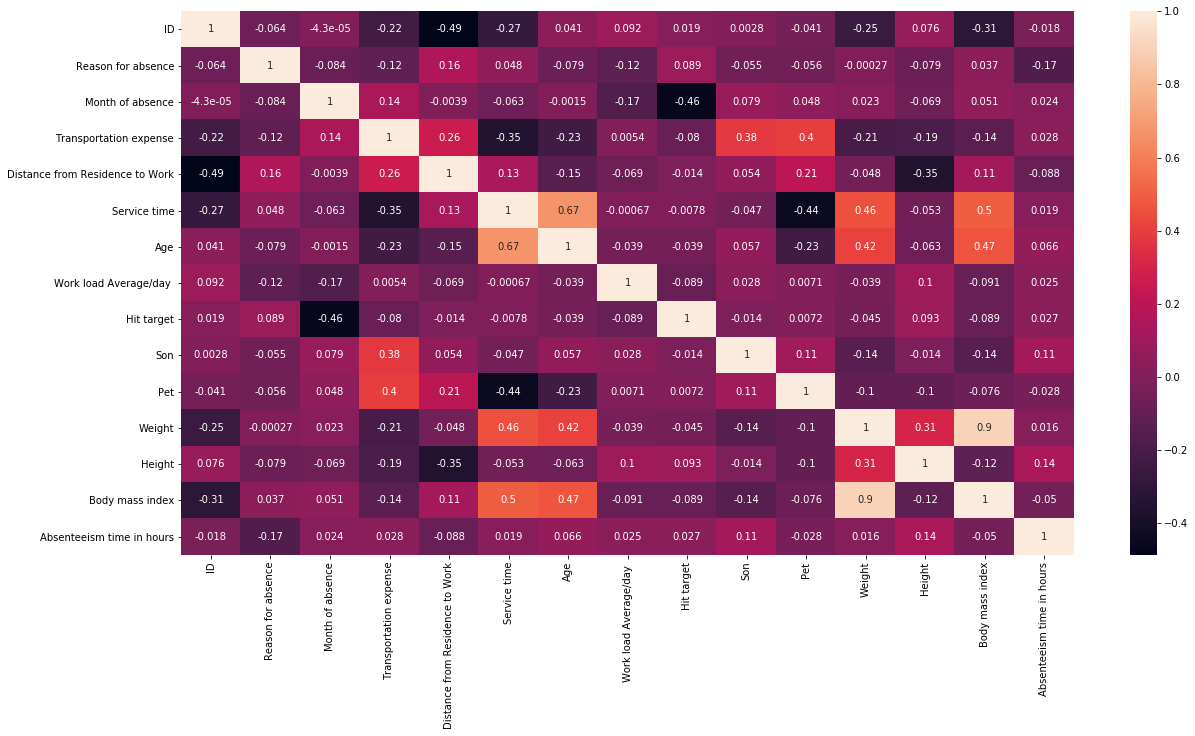

In [41]:
#Checking correlation

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

Skewness of ID = 0.02
Skewness of Reason for absence = -0.92
Skewness of Month of absence = 0.07
Skewness of Transportation expense = 0.40
Skewness of Distance from Residence to Work = 0.31
Skewness of Service time = -0.00
Skewness of Age = 0.70
Skewness of Work load Average/day  = 0.96
Skewness of Hit target = -1.26
Skewness of Son = 1.09
Skewness of Pet = 2.74
Skewness of Weight = 0.02
Skewness of Height = 2.57
Skewness of Body mass index = 0.31
Skewness of Absenteeism time in hours = 5.72


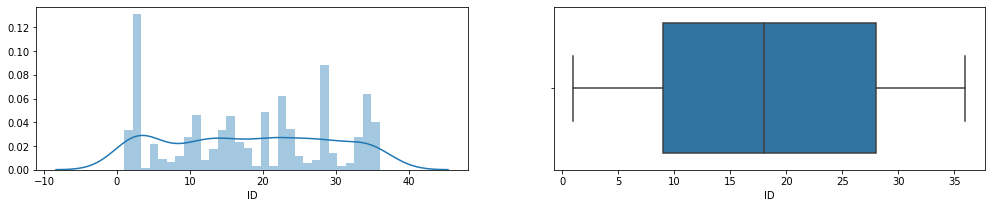

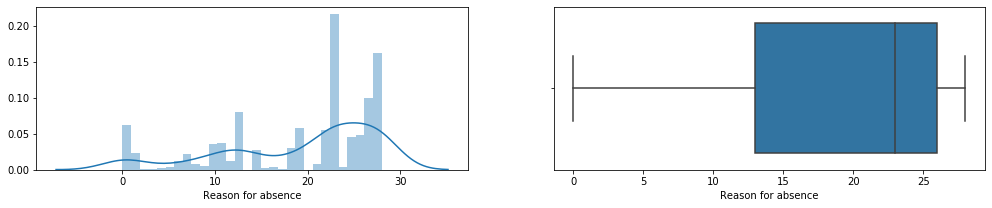

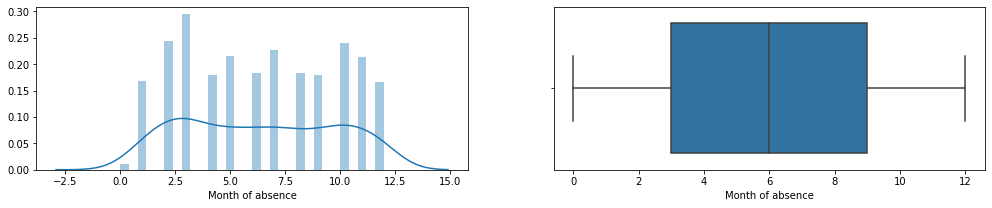

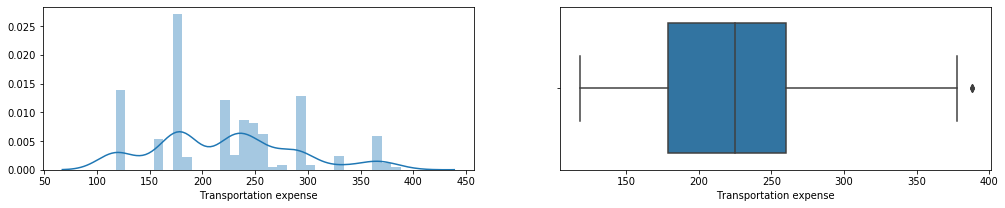

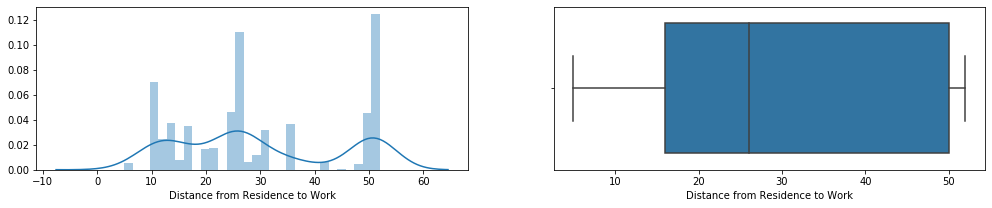

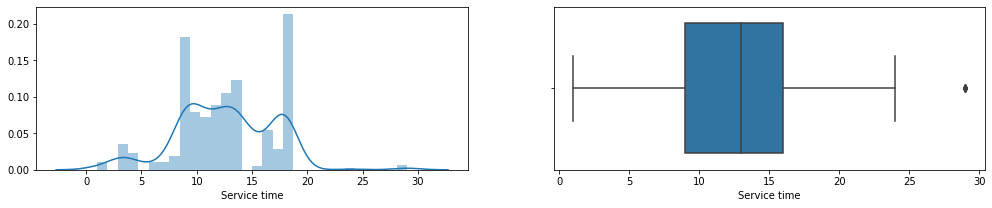

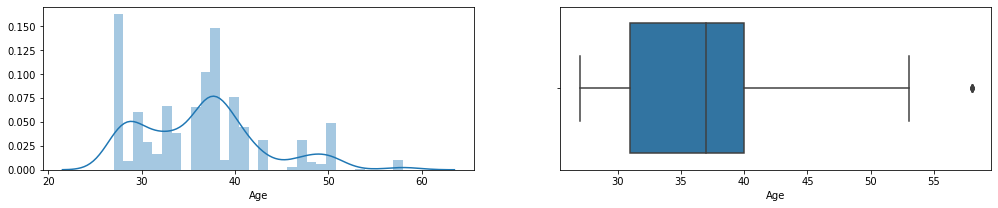

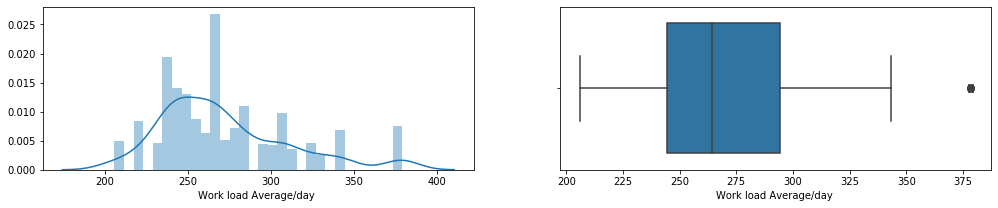

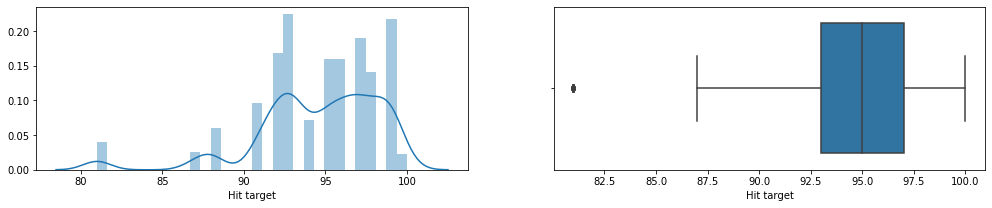

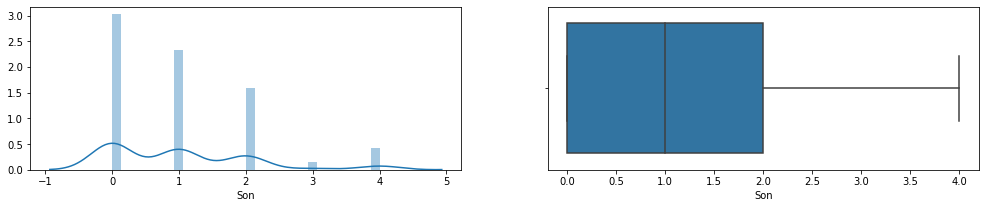

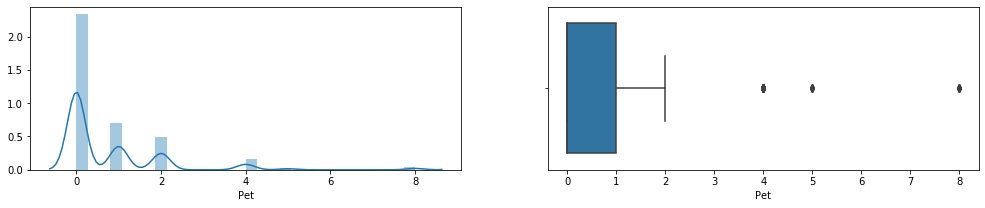

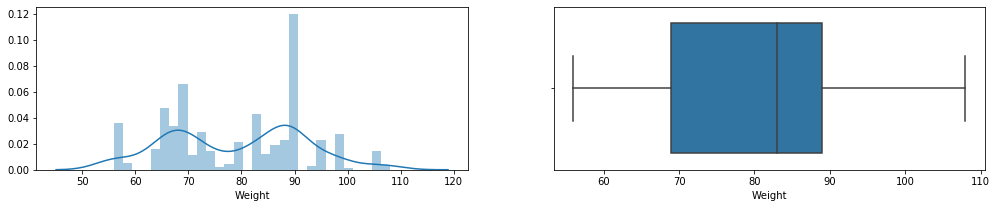

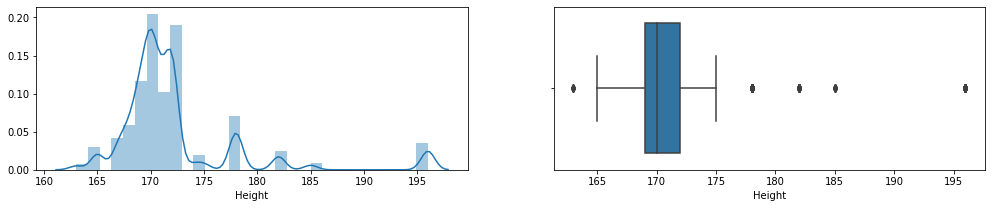

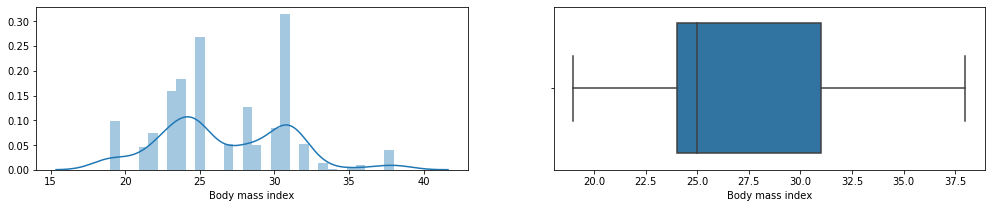

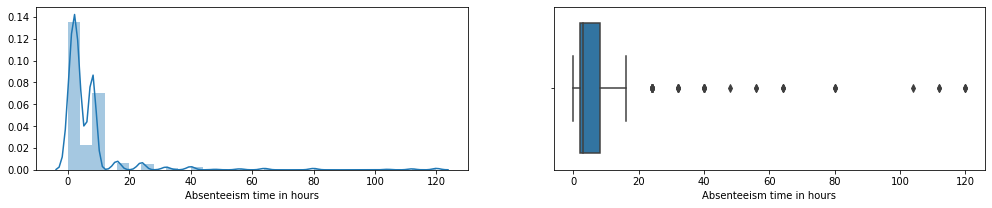

In [42]:
#Univariate analysis of numerical data
for i in num_df:
    f=plt.figure(figsize=(17,3))
    f.add_subplot(1,2,1)
    sns.distplot(df[i],bins=30)
    f.add_subplot(1,2,2)
    sns.boxplot(df[i])
    print('Skewness of %s = %0.2f' %(i,df[i].skew()))

Observation:
    1.Almost all the features are skewed hence th skewness has to be removed.
    2.Outliers are present in some features.

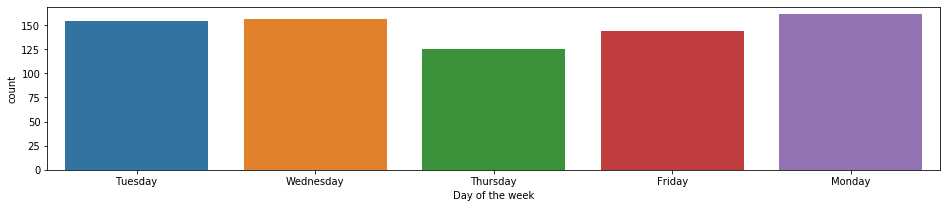

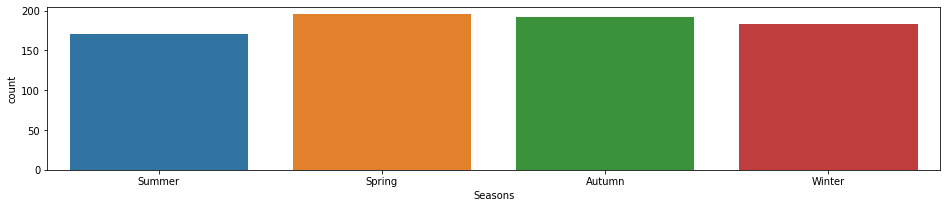

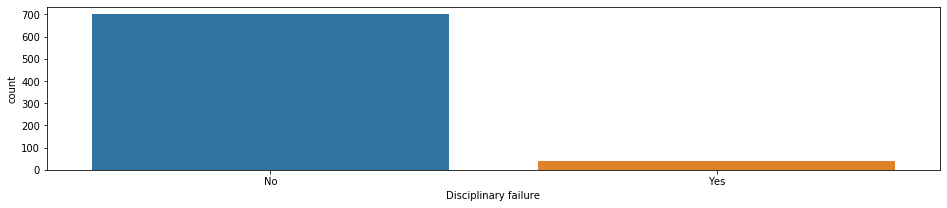

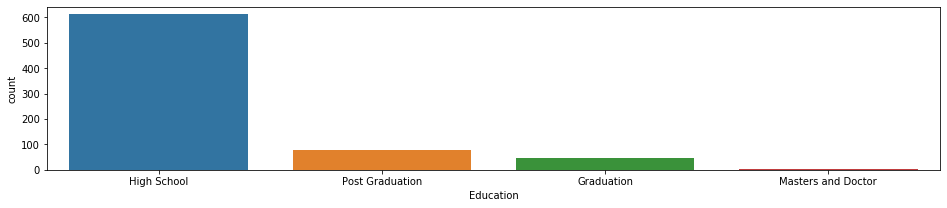

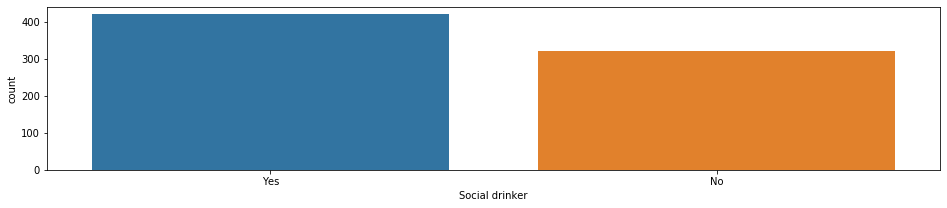

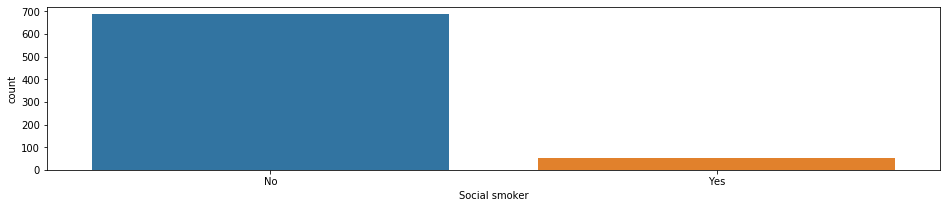

In [43]:
#Univariate analysis of categorical features
for i in cat_df:
    f=plt.figure(figsize=(16,3))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])

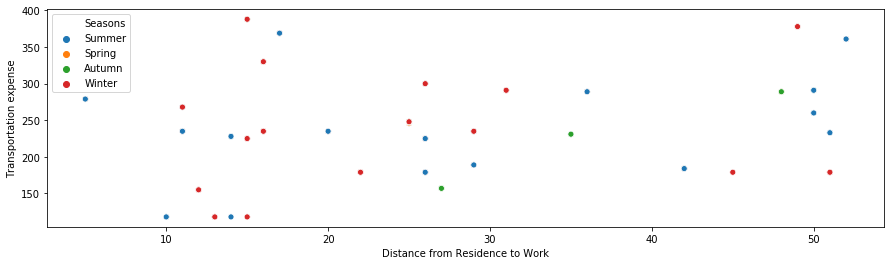

In [44]:
#Bivariate analysis

plt.figure(figsize=(15,4))
sns.scatterplot(x='Distance from Residence to Work',y='Transportation expense',hue='Seasons',data=df)

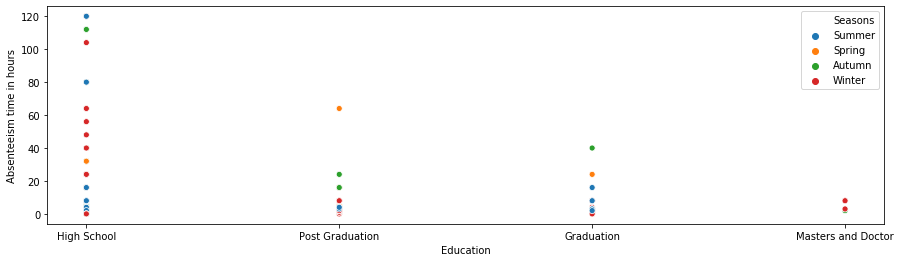

In [45]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Education',y='Absenteeism time in hours',hue='Seasons',data=df)

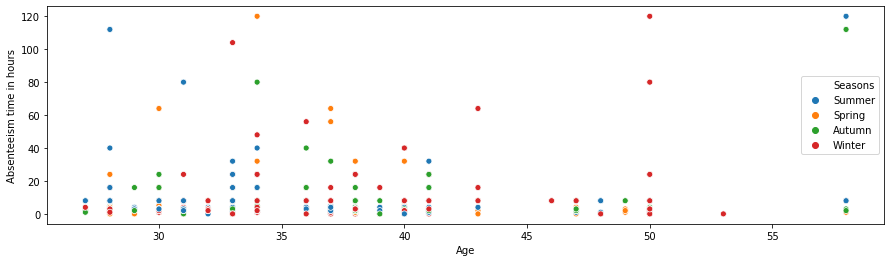

In [46]:
plt.figure(figsize=(15,4))
sns.scatterplot(x='Age',y='Absenteeism time in hours',hue='Seasons',data=df)

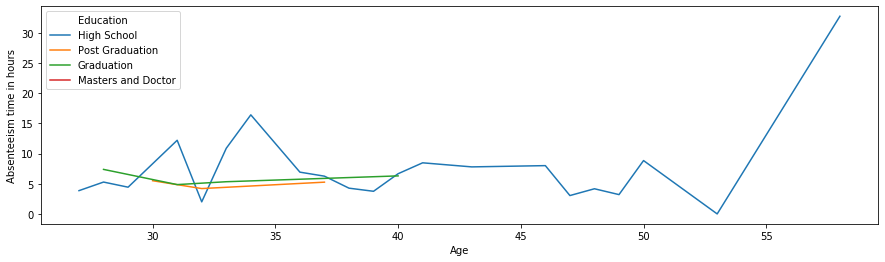

In [47]:
plt.figure(figsize=(15,4))
sns.lineplot(x='Age',y='Absenteeism time in hours',hue='Education',data=df,ci=None)

### Removing Skewness

In [48]:
#Cheking skewness

print(df.skew())
print("Total count of numerical features:",len(df.skew()))
print("count of features which are significantly skewed:",len(df.skew().loc[abs(df.skew())>0.5]))

ID                                 0.016606
Reason for absence                -0.915312
Month of absence                   0.069369
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.697703
Work load Average/day              0.961457
Hit target                        -1.261708
Son                                1.086465
Pet                                2.735715
Weight                             0.017001
Height                             2.566060
Body mass index                    0.305046
Absenteeism time in hours          5.720728
dtype: float64
Total count of numerical features: 15
count of features which are significantly skewed: 8


In [49]:
#Treating skewness

import numpy as np
for index in df.skew().index:
    if df.skew().loc[index]>0.5:
        df[index]=np.log1p(df[index])
    if df.skew().loc[index]<-0.5:
        df[index]=np.square(df[index])

In [50]:
#checking skewness again
print(df.skew())
print("Total count of numerical features:",len(df.skew()))
print("count of features which are significantly skewed:",len(df.skew().loc[abs(df.skew())>0.5]))

ID                                 0.016606
Reason for absence                -0.286024
Month of absence                   0.069369
Transportation expense             0.396189
Distance from Residence to Work    0.312083
Service time                      -0.004720
Age                                0.268628
Work load Average/day              0.618996
Hit target                        -1.092592
Son                                0.254626
Pet                                1.192919
Weight                             0.017001
Height                             2.429570
Body mass index                    0.305046
Absenteeism time in hours          0.749686
dtype: float64
Total count of numerical features: 15
count of features which are significantly skewed: 5


Observation:
    Based on the above results ,the skewness is being reduced from 
    8 features to 5 features.

In [51]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,676,7,Tuesday,Summer,289,36,13,3.526361,5.482945,...,No,High School,1.098612,Yes,No,0.693147,90,5.153292,30,1.609438
1,36,0,7,Tuesday,Summer,118,13,18,3.931826,5.482945,...,Yes,High School,0.693147,Yes,No,0.000000,98,5.187386,31,0.000000
2,3,529,7,Wednesday,Summer,179,51,18,3.663562,5.482945,...,No,High School,0.000000,Yes,No,0.000000,89,5.141664,31,1.098612
3,7,49,7,Thursday,Summer,279,5,14,3.688879,5.482945,...,No,High School,1.098612,Yes,Yes,0.000000,68,5.129899,24,1.609438
4,11,529,7,Thursday,Summer,289,36,13,3.526361,5.482945,...,No,High School,1.098612,Yes,No,0.693147,90,5.153292,30,1.098612


### Removing Outliers

In [52]:
df.shape

(740, 21)

In [53]:
#Separating categorical columns and numerical columns

cat_df,num_df=[],[]
for i in df.columns:
    if df[i].dtype=='O':
        cat_df.append(i)
    else:
        num_df.append(i)
        
print('cat_df--->\n',cat_df,'\nnum_df-->\n',num_df)

cat_df--->
 ['Day of the week', 'Seasons', 'Disciplinary failure', 'Education', 'Social drinker', 'Social smoker'] 
num_df-->
 ['ID', 'Reason for absence', 'Month of absence', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 'Age', 'Work load Average/day ', 'Hit target', 'Son', 'Pet', 'Weight', 'Height', 'Body mass index', 'Absenteeism time in hours']


In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df[num_df]))
z

array([[0.63716146, 0.88072575, 0.19676258, ..., 0.00267975, 0.77593223,
        0.0244083 ],
       [1.63271857, 1.64512618, 0.19676258, ..., 1.01724856, 1.00943766,
        1.8460481 ],
       [1.36352307, 0.33146505, 0.19676258, ..., 0.3505325 , 1.00943766,
        0.56926297],
       ...,
       [1.27272787, 1.64512618, 1.84169773, ..., 0.3505325 , 1.70995395,
        1.8460481 ],
       [0.90954706, 1.64512618, 1.84169773, ..., 0.3505325 , 1.94345938,
        1.8460481 ],
       [1.54192337, 1.64512618, 1.84169773, ..., 0.5116309 , 0.39159492,
        1.8460481 ]])

In [55]:
threshold=3
print(np.where(z>3))

(array([  8,  44,  85,  89,  99, 116, 140, 165, 167, 186, 188, 199, 205,
       206, 210, 226, 231, 234, 236, 242, 270, 271, 272, 273, 274, 275,
       276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288,
       299, 323, 323, 360, 362, 420, 471, 498, 507, 510, 513, 564, 569,
       569, 576, 579, 594, 603, 608, 622, 648, 652, 670, 682, 692, 702,
       704, 712, 721, 724, 726, 729, 734, 737], dtype=int64), array([12, 12, 12, 12, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14,
        5, 12, 12,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8, 14, 12, 14, 12, 12, 14, 14, 12,  5,  5,  5, 10,
       12, 14,  5, 12, 10, 10, 12, 14, 12, 14, 12, 14, 12, 12, 12, 10, 10,
       10, 10, 14, 14, 10], dtype=int64))


In [56]:
df=df[(z<3).all(axis=1)]

In [57]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,676,7,Tuesday,Summer,289,36,13,3.526361,5.482945,...,No,High School,1.098612,Yes,No,0.693147,90,5.153292,30,1.609438
1,36,0,7,Tuesday,Summer,118,13,18,3.931826,5.482945,...,Yes,High School,0.693147,Yes,No,0.000000,98,5.187386,31,0.000000
2,3,529,7,Wednesday,Summer,179,51,18,3.663562,5.482945,...,No,High School,0.000000,Yes,No,0.000000,89,5.141664,31,1.098612
3,7,49,7,Thursday,Summer,279,5,14,3.688879,5.482945,...,No,High School,1.098612,Yes,Yes,0.000000,68,5.129899,24,1.609438
4,11,529,7,Thursday,Summer,289,36,13,3.526361,5.482945,...,No,High School,1.098612,Yes,No,0.693147,90,5.153292,30,1.098612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733,28,484,7,Wednesday,Summer,225,26,9,3.367296,5.582006,...,No,High School,0.693147,No,No,1.098612,69,5.135798,24,2.197225
735,11,196,7,Tuesday,Summer,289,36,13,3.526361,5.582006,...,No,High School,1.098612,Yes,No,0.693147,90,5.153292,30,2.197225
736,1,121,7,Tuesday,Summer,235,11,14,3.637586,5.582006,...,No,Post Graduation,0.693147,No,No,0.693147,88,5.153292,29,1.609438
738,8,0,0,Wednesday,Autumn,231,35,14,3.688879,5.606607,...,No,High School,1.098612,Yes,No,1.098612,100,5.141664,35,0.000000


In [58]:
df.shape

(669, 21)

Observation: 71 rows are detected as outliers.

### Preprocessing the data

In [59]:
#Transforming non numeric columns into numeric columns

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [60]:
#Splitting the data into input and output variable

x=df.drop(columns=['Absenteeism time in hours'],axis=1)
x.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,9,25,7,3,2,14,16,9,3.526361,5.482945,8,0,1,1.098612,1,0,0.693147,19,5.153292,9
1,31,0,7,3,2,0,3,14,3.931826,5.482945,8,1,1,0.693147,1,0,0.000000,21,5.187386,10
2,2,22,7,4,2,2,21,14,3.663562,5.482945,8,0,1,0.000000,1,0,0.000000,18,5.141664,10
3,5,7,7,2,2,13,0,10,3.688879,5.482945,8,0,1,1.098612,1,1,0.000000,5,5.129899,4
4,9,22,7,2,2,14,16,9,3.526361,5.482945,8,0,1,1.098612,1,0,0.693147,19,5.153292,9


In [61]:
y=df['Absenteeism time in hours']
y.head()

0    1.609438
1    0.000000
2    1.098612
3    1.609438
4    1.098612
Name: Absenteeism time in hours, dtype: float64

In [62]:
print(x.shape,'\t\t',y.shape)

(669, 20) 		 (669,)


In [63]:
#Scaling input variables

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
x=ss.fit_transform(x)

## Machine Learning Algorithm

In [64]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train.shape:',x_train.shape,'\t\tx_test.shape:',x_test.shape)
print('y_train.shape:',y_train.shape,'\t\ty_test.shape:',y_test.shape)


x_train.shape: (535, 20) 		x_test.shape: (134, 20)
y_train.shape: (535,) 		y_test.shape: (134,)


In [65]:
#Importing all the libraries

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score



In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def models(model,x_train,x_test,y_train,y_test,score,rmse):
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    score.append(model.score(x_train,y_train))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
    print('Score:',model.score(x_train,y_train))
    print('RMSE:',np.sqrt(mean_squared_error(y_test,pred)))
    print('r2_score:',r2_score(y_test,pred))

In [67]:
model_name,score,rmse=[],[],[]

In [68]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
mod='Linear Regression'
print('Model report for:',mod)
models(lreg,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Linear Regression
Score: 0.42631731605899076
RMSE: 0.5332281221669113
r2_score: 0.4024302667221141


In [69]:
#Ridge Regression

from sklearn.linear_model import Ridge
parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Ridge(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'alpha': 1}

In [70]:
rr=Ridge(alpha=1)
mod='Ridge Regression'
print('Model report for:',mod)
models(rr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Ridge Regression
Score: 0.42617340498976625
RMSE: 0.5336231872515088
r2_score: 0.4015444680102641


In [71]:
#Lasso Regression
from sklearn.linear_model import Lasso

parameters={'alpha':[0.001,0.01,0.1,1]}
best=GridSearchCV(Lasso(),parameters)
best.fit(x_train,y_train)
best.best_params_




{'alpha': 0.01}

In [72]:
lr=Lasso(alpha=0.01)
mod='Lasso Regression'
print('Model report for',mod)
models(lr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for Lasso Regression
Score: 0.4180204540922914
RMSE: 0.5339741855084347
r2_score: 0.4007569237747848


In [73]:
#ElastiNet

from sklearn.linear_model import ElasticNet
enr=ElasticNet(alpha=0.01)
mod='ElasticNet'
print('Model report for:',mod)
models(enr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: ElasticNet
Score: 0.4215213187998728
RMSE: 0.5348018944332231
r2_score: 0.39889772054881656


In [74]:
#KNEighbors Regression

from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
mod='KNeighbors Regression'
print('Model report for',mod)
models(knr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)


Model report for KNeighbors Regression
Score: 0.5376578911104208
RMSE: 0.6445739171574342
r2_score: 0.12681160272767167


In [75]:
#Support Vector Regression

from sklearn.svm import SVR
parameters={'kernel':['linear','poly','rbf']}
best=GridSearchCV(SVR(),parameters)
best.fit(x_train,y_train)
best.best_params_


{'kernel': 'linear'}

In [76]:
svr=SVR(kernel='linear')
mod='Support Vector Regression'
print('Model report for:',mod)
models(svr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Support Vector Regression
Score: 0.41086734963891386
RMSE: 0.5369462472509289
r2_score: 0.39406767214638383


In [77]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
parameters={'max_depth':[8,10,12,15],'min_samples_leaf':[100,150]}
best=GridSearchCV(DecisionTreeRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 8, 'min_samples_leaf': 100}

In [78]:
dct=DecisionTreeRegressor(max_depth=8,min_samples_leaf=100)
mod=DecisionTreeRegressor()
models(dct,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Score: 0.19859915743424705
RMSE: 0.6186373972502616
r2_score: 0.19566893786855766


In [79]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
parameters={'n_estimators':[200,300,400],'max_depth':[5,6]}
best=GridSearchCV(RandomForestRegressor(),parameters)
best.fit(x_train,y_train)
best.best_params_

{'max_depth': 6, 'n_estimators': 300}

In [80]:
rfr=RandomForestRegressor(max_depth=6,n_estimators=300)
mod='Random Forest Regressor'
print('Model report for:',mod)
models(rfr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Random Forest Regressor
Score: 0.6977868216873606
RMSE: 0.44072286221647455
r2_score: 0.5917805807221583


In [81]:
#Gradient Boosting regressor
gbr=GradientBoostingRegressor(n_estimators=250)
mod='Gradient Boosting Regressor'
print('Model report for:',mod)
models(gbr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: Gradient Boosting Regressor
Score: 0.8514670322333313
RMSE: 0.46763907047530173
r2_score: 0.5403957054779663


In [82]:
#AdaBoost Regressor

abr=AdaBoostRegressor(n_estimators=50)
mod='AdaBoost Regressor'
print('Model report for:',mod)
models(abr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: AdaBoost Regressor
Score: 0.499527857885551
RMSE: 0.5116226328380221
r2_score: 0.4498742198921243


In [83]:
#ExtraTrees Regressor

etr=ExtraTreesRegressor()
mod='ExtraTrees Regressor'
print('Model report for:',mod)
models(etr,x_train,x_test,y_train,y_test,score,rmse)
model_name.append(mod)

Model report for: ExtraTrees Regressor
Score: 0.977385741378527
RMSE: 0.5084539331814221
r2_score: 0.456667450354201


In [84]:
final=pd.DataFrame({'Model name':model_name,'Score':score,'RMSE':rmse})
final

,Model name,Score,RMSE
0,Linear Regression,0.426317,0.533228
1,Ridge Regression,0.426173,0.533623
2,Lasso Regression,0.418020,0.533974
3,ElasticNet,0.421521,0.534802
4,KNeighbors Regression,0.537658,0.644574
5,Support Vector Regression,0.410867,0.536946
6,"DecisionTreeRegressor(ccp_alpha=0.0, criterion...",0.198599,0.618637
7,Random Forest Regressor,0.697787,0.440723
8,Gradient Boosting Regressor,0.851467,0.467639
9,AdaBoost Regressor,0.499528,0.511623


In [85]:
#Cross Validation score

model=[LinearRegression(),Ridge(alpha=1),Lasso(alpha=0.01),ElasticNet(alpha=0.01),
      KNeighborsRegressor(),SVR(kernel='linear'),DecisionTreeRegressor(max_depth=12,min_samples_leaf=100),
      RandomForestRegressor(n_estimators=300,max_depth=6),GradientBoostingRegressor(n_estimators=250),
      AdaBoostRegressor(n_estimators=50),ExtraTreesRegressor(n_estimators=10,random_state=42)]

for m in model:
    score=cross_val_score(m,x,y,cv=15,scoring='r2')
    print("Model:",m)
    print("Score:",score)
    print("Mean score:",score.mean())
    print("Standard Deviation:",score.std())
    print('************************************************************')
    print('\n')

Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: [0.08810028 0.57768399 0.23588993 0.29181747 0.42820706 0.45977149
 0.56992879 0.04637269 0.42979242 0.12133723 0.2690192  0.40806217
 0.37366988 0.30291447 0.11548977]
Mean score: 0.31453712181001936
Standard Deviation: 0.16392129071345785
************************************************************


Model: Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)
Score: [0.09511764 0.579179   0.23966439 0.28823195 0.4267836  0.45764032
 0.57120104 0.04400662 0.43366786 0.11746978 0.26782418 0.40692823
 0.38262499 0.31045274 0.11817041]
Mean score: 0.31593085006884963
Standard Deviation: 0.16402201282015033
************************************************************


Model: Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
    

In [86]:
#Initialising models with best parameters

LR=LinearRegression()
Ridge=Ridge(alpha=1,random_state=42)
Lasso=Lasso(alpha=0.01,random_state=42)
ElasticNet=ElasticNet(alpha=0.01,random_state=42)
KNR=KNeighborsRegressor()
SVR=SVR(kernel='linear')
DTR=DecisionTreeRegressor(max_depth=12,min_samples_leaf=100,random_state=42)
RFR=RandomForestRegressor(n_estimators=300,max_depth=6)
GBR=GradientBoostingRegressor(n_estimators=250)
ABR=AdaBoostRegressor(n_estimators=50)
ETR=ExtraTreesRegressor(n_estimators=10,random_state=42)

In [87]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Ridge',Ridge))
models.append(('Lasso',Lasso))
models.append(('ElasticNet',ElasticNet))
models.append(('KNeighborsRegressor',KNR))
models.append(('DecisionTreeRegressor',DTR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('AdaBoostRegressor',ABR))
models.append(('ExtraTreesRegressor',ETR))

In [88]:
Model=[]
Score=[]
R2_Score=[]
CVS=[]
MAE=[]
MSE=[]
RMSE=[]

for name,model in models:
    print('**************************',name,'*********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    
    #Score
    score=model.score(x_train,y_train)
    print('Score:',score)
    Score.append(score*100)
    print('\n')
    pred=model.predict(x_test)
    print('\n')
    
    # r2 Score
    r_score=r2_score(y_test,pred)
    print('R2 score:',r_score)
    R2_Score.append(r_score*100)    
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='r2').mean()
    print('Cross Val score:',cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #MAE
    mae=mean_absolute_error(y_test,pred)
    print('MAE:',mae)
    MAE.append(mae)
    print('\n')
    
    #MSE
    mse=mean_squared_error(y_test,pred)
    print('MSE:',mse)
    MSE.append(mse)
    print('\n')
    
    #RMSE
    rmse=np.sqrt(mean_squared_error(y_test,pred))
    print('RMSE:',rmse)
    RMSE.append(rmse)
    print('\n\n')
         

************************** LinearRegression *********************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Score: 0.42631731605899076




R2 score: 0.4024302667221141


Cross Val score: 0.31453712181001936


MAE: 0.3959621677145698


MSE: 0.2843322302696505


RMSE: 0.5332281221669113



************************** Ridge *********************


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)
Score: 0.42617340498976625




R2 score: 0.4015444680102641


Cross Val score: 0.31593085006884963


MAE: 0.39588464082087915


MSE: 0.2847537059724588


RMSE: 0.5336231872515088



************************** Lasso *********************


Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=42,
      selection='cyclic', tol=0.0001, warm_start=False)
Score: 0.4180204540922914




R2 score: 0.40075692

In [89]:
#Storing the result in dataframe

result=pd.DataFrame({'Model':Model,'Score':Score,'R2_Score':R2_Score,'Cross_val_Score':CVS,
                    'MAE':MAE,'MSE':MSE,'RMSE':RMSE})
result

,Model,Score,R2_Score,Cross_val_Score,MAE,MSE,RMSE
0,LinearRegression,42.631732,40.243027,31.453712,0.395962,0.284332,0.533228
1,Ridge,42.617340,40.154447,31.593085,0.395885,0.284754,0.533623
2,Lasso,41.802045,40.075692,31.772774,0.399538,0.285128,0.533974
3,ElasticNet,42.152132,39.889772,31.774799,0.398651,0.286013,0.534802
4,KNeighborsRegressor,53.765789,12.681160,11.172777,0.473421,0.415476,0.644574
5,DecisionTreeRegressor,19.859916,19.566894,9.794059,0.461958,0.382712,0.618637
6,RandomForestRegressor,69.689432,59.713905,44.787348,0.325178,0.191687,0.437821
7,GradientBoostingRegressor,85.146703,53.995743,35.906530,0.352993,0.218895,0.467862
8,AdaBoostRegressor,51.343712,46.426039,33.153478,0.406472,0.254913,0.504889
9,ExtraTreesRegressor,97.738574,45.692054,35.180946,0.347636,0.258405,0.508335


Conclusion:
    ExtraTReesRegressor gives the highest accuracy rate. Maximum r2 score is achieved 
    by RandomForestRegressor.

In [2]:
#Saving the model

from sklearn.externals import joblib
from joblib import dump

joblib.dump(ETR,'ETR_Absenteeism_at_work.pkl')

NameError: name 'ETR' is not defined